# Homework 1

### Q1

step1: 先讀取資料，再標準化所有feature values，觀察訓練與測試資料的大小。  
step2: 完成myknn_regressor的class：暴力法的演算法是先算出每筆測試資料與各個訓練資料的距離，然後找出距離最近的k個鄰居，再依照不同類型算出Y_train的平均值。  
step3: 計算實際值與預測值的RMSE。

In [15]:
import pickle
from sklearn import preprocessing
import numpy as np

In [16]:
# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [17]:
# size of data
print(f'train_size: {X_train.shape[0]}')
print(f'test_size: {X_test.shape[0]}')

train_size: 5000
test_size: 3000


In [18]:
msd_data['X_test']

array([[  38.51784,   55.38723,   10.31652, ...,    6.66624,  -73.75585,
           9.47857],
       [  44.7309 ,   46.25776,    8.55636, ...,    4.5564 ,   53.49956,
           5.39116],
       [  43.08912,   45.70197,   17.18467, ...,  -13.64909,   -7.42137,
          -4.97266],
       ...,
       [  39.81814,   62.12221,    6.60567, ...,   28.27807,  -60.00203,
         -11.19226],
       [  50.25968,   43.10325,   24.72866, ...,    2.71602,  -44.27226,
          -2.54583],
       [  41.39744,   -8.88692,  -20.15887, ...,    8.63798, -120.34024,
           3.65709]])

### Q1.1

In [63]:
class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        """mean_type can be equal_weight or remove_outliers.
                              equal_weight use the same weight for all neighbors.
                              remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR]."""
        ### Add your code here ###  
        '''save parameters'''   
        self.n_neighbors = n_neighbors 
        self.mean_type = mean_type

    def fit(self, x_train, y_train):
        ### Add your code here ###
        '''save training data'''
        self.x_train = x_train
        self.y_train = y_train
         

    def predict(self, x_test):
        """use remove_outliers only if k>=10"""
         ### Add your code here ###
        if self.n_neighbors < 10:
            self.mean_type = "equal_weight"
        
        
        self.x_test = x_test
        n_train = self.x_train.shape[0]
        n_test = self.x_test.shape[0]
        y_pred = []
        
        for i in range(n_test): # for every x_test
            dist = []
            for j in range(n_train): # for every x_train
                # Euclidean distance between x_test's ith row and x_train's jth row
                d = np.linalg.norm(self.x_test[i,:] - self.x_train[j,:])
                dist.append([d, self.y_train[j]])
            
            sort_dist = sorted(dist, key = lambda l: l[0]) # sort y_train by distance in ascending order


            # k nearest neighbors' y_train
            k_neighbors = []
            for k in range(self.n_neighbors):
                k_neighbors.append(sort_dist[k][1]) 

            
            if self.mean_type == "equal_weight":
                y_pred.append(np.mean(k_neighbors))
            else: # remove_outliers
                q1 = np.quantile(k_neighbors,0.25) 
                q3 = np.quantile(k_neighbors,0.75)
                iqr = q3 - q1
                
                new_neighbors = []
                for k in range(len(k_neighbors)):
                    y = k_neighbors[k]
                    if y >= (q1 - (1.5 * iqr)) and y <= (q3 + (1.5 * iqr)):
                        new_neighbors.append(y)

                y_pred.append(np.mean(new_neighbors))

        return np.array(y_pred)

### Q1.2

In [64]:
# use myknn_regressor
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

In [65]:
# count RMSE
actual = Y_test
predicted = ypred
square = np.square(np.subtract(actual, predicted))
MSE = square.mean()
RMSE = np.sqrt(MSE)

print(f'RMSE: {RMSE}')

RMSE: 10.25126451549596


In [68]:
# print first 20 predictions
print("Q1.2 | first 20 predictions:")
print(ypred[:20])

Q1.2 | first 20 predictions:
[1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]


### Q1.3

In [69]:
# use myknn_regressor
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

In [71]:
# count RMSE
actual = Y_test
predicted = ypred
square = np.square(np.subtract(actual, predicted))
MSE = square.mean()
RMSE = np.sqrt(MSE)

print(f'RMSE: {RMSE}')

RMSE: 10.212572466080376


In [73]:
# print first 20 predictions
print("Q1.3 | first 20 predictions:")
for i in ypred[:20]:
    print(i)

Q1.3 | first 20 predictions:
1993.35
1993.8
2000.65
1992.7368421052631
1992.8
2000.0
1988.1
1991.65
2002.25
2003.9473684210527
2000.5
2000.9444444444443
1995.55
1997.2
1998.611111111111
1997.4
1992.15
2003.8333333333333
2003.2
1995.75


### Q2

In [49]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
klist = [1 , 2 , 3 , 4 , 5 , 10 , 15 , 20 , 25 , 30 , 35 , 40 , 45 , 50 , 55 , 60 , 80 , 100 , 120 , 140 , 160 , 180 , 200]

##### setting1

In [52]:
rmse_list1 = []

for k in klist:
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X_train, Y_train)
    ypred1 = knn1.predict(X_test)
    
    square1 = np.square(np.subtract(Y_test, ypred1))
    mse1 = square1.mean()
    rmse1 = np.sqrt(mse1)
    rmse_list1.append(rmse1)

In [53]:
rmse_list1

[13.911074724837043,
 15.532793266720144,
 16.940552922892845,
 18.002388730387977,
 18.343036826000212,
 15.021429137513293,
 13.296503299740124,
 12.806235460378927,
 12.530762147610975,
 12.397271205121445,
 12.46698306193871,
 12.258833549730578,
 12.234514021134364,
 12.29800796877283,
 12.29592073277421,
 12.308465921199657,
 12.539125434681107,
 12.77006917235246,
 12.875273459879082,
 13.00256384974389,
 13.039734148619237,
 13.12649991429551,
 13.190248923605145]

##### setting2

In [57]:
# No feature scaling
doscaling = 0

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [58]:
rmse_list2 = []

for k in klist:
    knn2 = KNeighborsClassifier(n_neighbors = k)
    knn2.fit(X_train, Y_train)
    ypred2 = knn2.predict(X_test)
    
    square2 = np.square(np.subtract(Y_test, ypred2))
    mse2 = square2.mean()
    rmse2 = np.sqrt(mse2)
    rmse_list2.append(rmse2)

In [59]:
rmse_list2

[14.923638966418345,
 16.527219971913002,
 17.958025132699493,
 18.922209173349714,
 19.2830149786455,
 15.532492824184189,
 13.574596372145534,
 13.365228517811932,
 13.05419472813241,
 12.818775292515271,
 12.52252636917434,
 12.618953997855765,
 12.639356523705363,
 12.519278466961797,
 12.599576712466707,
 12.60072749222573,
 12.871764965743173,
 13.047745654582123,
 13.095648132108622,
 13.170143000995344,
 13.196754651554803,
 13.26514229098203,
 13.213793298418638]

##### setting3

In [61]:
# No feature scaling
doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [62]:
rmse_list3 = []

for k in klist:
    knn3 = myknn_regressor(k, "remove_outliers")
    knn3.fit(X_train, Y_train)
    ypred3 = np.array(knn3.predict(X_test))
    
    square3 = np.square(np.subtract(Y_test, ypred3))
    mse3 = square3.mean()
    rmse3 = np.sqrt(mse3)
    rmse_list3.append(rmse3)

KeyboardInterrupt: 

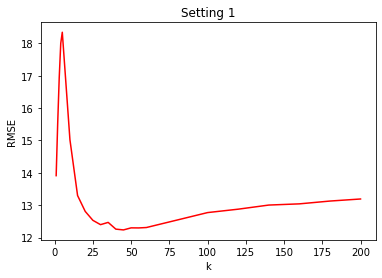

In [55]:
# draw the error curve

plt.plot(klist, rmse_list1, color='red')
plt.title('Setting 1')
plt.xlabel('k') # title of x-axis
plt.ylabel('RMSE') # tile of y-axis
plt.show()